I examine how well `FIREFLY` fits the source spectra of LGal spectral mocks. 

In [1]:
import h5py
import numpy as np 
# -- FOMOspec -- 
from FOMOspec import util as UT

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as pl 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [3]:
def readFirefly(galid, dust='hpf_only'): 
    fname = ''.join([UT.dat_dir(), 'Lgal/templates/firefly.m11.MILES.imf_cha.dust_', dust, '.gal_spectrum_', str(galid), '_BGS_template_BC03_Stelib.hdf5'])
    f = h5py.File(fname, 'r')
    
    output = {} 
    for g in f.keys(): 
        if g == 'properties': 
            continue
        else: 
            output[g] = f[g].value
            
    props = {} 
    for k in f['properties'].keys(): 
        props[k] = f['properties'][k].value
    return output, props

Here's what the source spectra for 3 random galaxies look like

(0.0, 5.0)

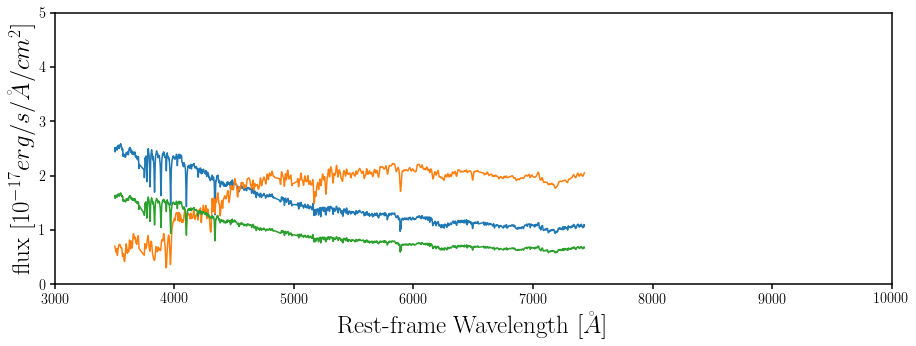

In [17]:
fig = plt.figure(figsize=(15,5)) 
sub = fig.add_subplot(111)
for ii, idd in enumerate([101314, 253044, 10924]): 
    out, prop = readFirefly(idd, dust='hpf_only')
    sub.plot(out['wavelength'], out['flux_data'])
sub.set_xlabel('Rest-frame Wavelength [$\AA$]', fontsize=25)
sub.set_xlim([3e3, 1e4])
sub.set_ylabel('flux [$10^{-17} erg/s/\AA/cm^2$]', fontsize=25)
sub.set_ylim([0., 5.])

Text(0.5,0,'Rest-frame Wavelength [$\\AA$]')

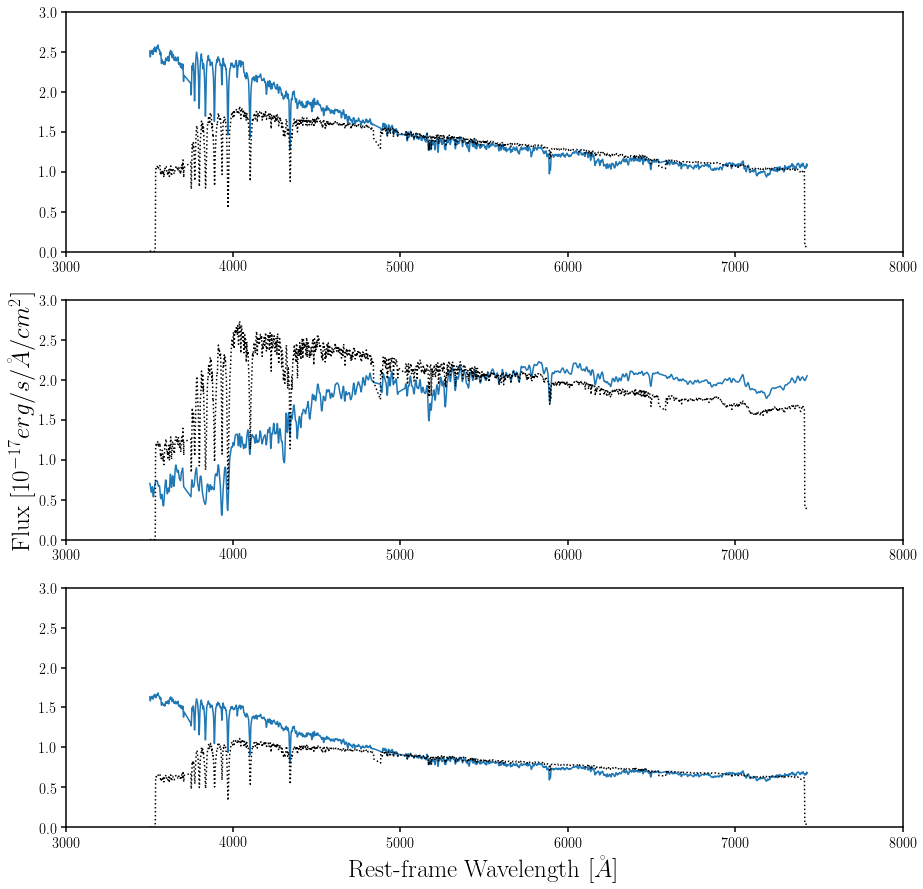

In [20]:
fig = plt.figure(figsize=(15,15)) 
for ii, idd in enumerate([101314, 253044, 10924]): 
    sub = fig.add_subplot(3,1,ii+1)
    out, prop = readFirefly(idd, dust='hpf_only')
    sub.plot(out['wavelength'], out['flux_data'])
    sub.plot(out['wavelength'], out['flux_bestfit'], c='k', ls=':')
    sub.set_xlim([3e3, 8e3])
    if ii == 1: sub.set_ylabel('Flux [$10^{-17} erg/s/\AA/cm^2$]', fontsize=25)
    sub.set_ylim([0., 3])
sub.set_xlabel('Rest-frame Wavelength [$\AA$]', fontsize=25)

Without proper dust fitting, `FIREFLY` doesn't do great...

Text(0.5,0,'Rest-frame Wavelength [$\\AA$]')

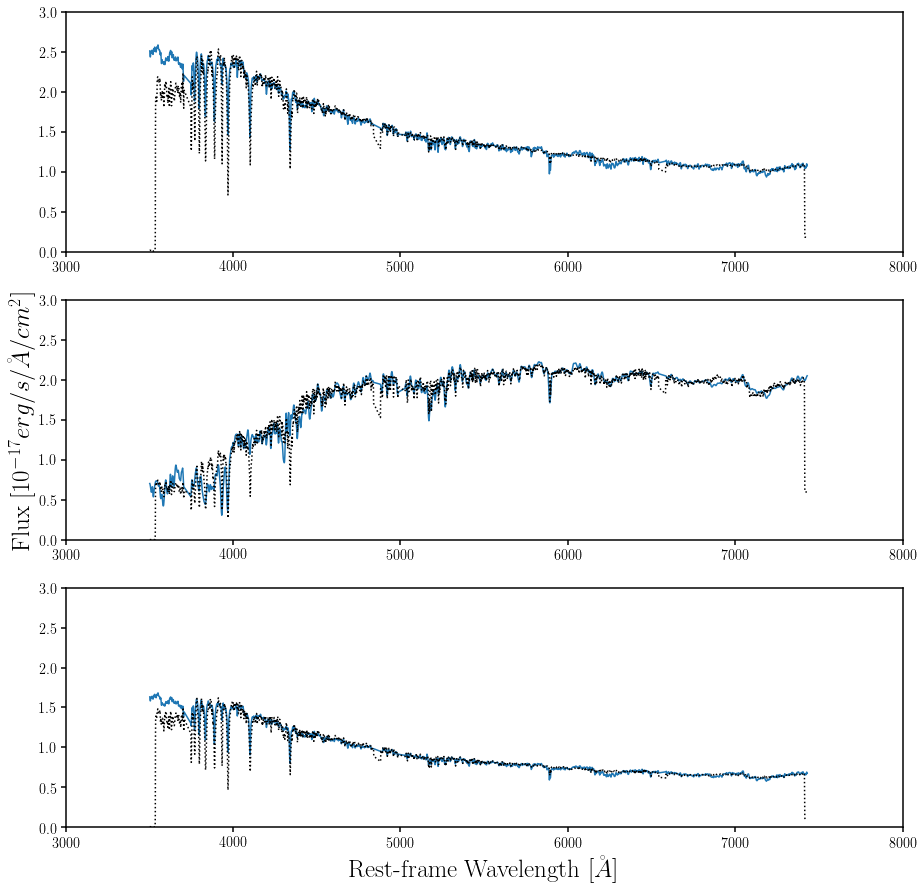

In [22]:
fig = plt.figure(figsize=(15,15)) 
for ii, idd in enumerate([101314, 253044, 10924]): 
    sub = fig.add_subplot(3,1,ii+1)
    out, prop = readFirefly(idd, dust='on')
    sub.plot(out['wavelength'], out['flux_data'])
    sub.plot(out['wavelength'], out['flux_bestfit'], c='k', ls=':')
    sub.set_xlim([3e3, 8e3])
    if ii == 1: sub.set_ylabel('Flux [$10^{-17} erg/s/\AA/cm^2$]', fontsize=25)
    sub.set_ylim([0., 3.])
sub.set_xlabel('Rest-frame Wavelength [$\AA$]', fontsize=25)

But with `hpf_mode=0`, `FIREFLY` fits the LGal source spectra reasonably well...